# Notebook notes

This notebook is for testing and training of CNN-based DQN

Each member of "options" list is a State99 

what happens after call step?

1. state of the player controlled by Agent is updated. It becomes exactly as one passed in "aciton" dictionary
2. states of all other players are updated
3. after all of the updates happened, *.step() calculates all options for the NEXT step (for pieces it holds at hand and in swap). These options, along with rewards they will trigger, are returned.

# Import libs

**setup autoreload**

In [1]:
%load_ext autoreload
%autoreload 2

**configure system path**

In [2]:
import os
import sys

# list directories where packages are stored
# note that the parent directory of te repo is added automatically
GYM_FOLDER = "gym-t99"

# get this notebook's current working directory
nb_cwd = os.getcwd()
# get name of its parent directory
nb_parent = os.path.dirname(nb_cwd)
# add packages to path
sys.path.insert(len(sys.path), nb_parent)
sys.path.insert(len(sys.path), os.path.join(nb_parent, GYM_FOLDER))

**import custom packages**

Use this code if you have not yet loaded gym_t99

In [3]:
import gym
registered = gym.envs.registration.registry.env_specs.copy()

import gym_t99
import t_net

pygame 2.0.1 (SDL 2.0.14, Python 3.8.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


**import custom packages**

Use this code if you have already loaded gym_t99, but now you introduced changes and want to re-load it again

In [58]:
import imp

# this code removes environment from gym's registry
env_dict = gym.envs.registration.registry.env_specs.copy()
for env in env_dict:
    if env not in registered:
        print("Remove {} from registry".format(env))
        del gym.envs.registration.registry.env_specs[env]

imp.reload(gym_t99)

Remove basic-v0 from registry
Remove t99-v0 from registry
Remove t99sc-v0 from registry


<module 'gym_t99' from 'C:\\Users\\slavc\\Desktop\\UCLA\\Courses\\Spring_2021\\239AS\\239AS_T99_RL_Agent\\gym-t99\\gym_t99\\__init__.py'>

In [6]:
import imp
imp.reload(t_net)

<module 't_net' from 'C:\\Users\\slavc\\Desktop\\UCLA\\Courses\\Spring_2021\\239AS\\239AS_T99_RL_Agent\\t_net\\__init__.py'>

**import out-of-the-box packages**

In [4]:
# import matplotlib
import matplotlib.pyplot as plt
# configure matplotlib
%matplotlib inline

import numpy as np
from copy import deepcopy

# import torch
import torch
from torch import nn

# configure torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


# Testground

In [5]:
custom_gym = gym.make('gym_t99:t99sc-v0', num_players = 2, enemy=None)

In [ ]:
custom_gym.reset()

In [7]:
frame = custom_gym.render(mode="debug")
# frame[0][-4, 2:6] = 1
print(frame[0])

[[10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  4  4  4  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  4  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  0

# NN training

In [6]:
# initialize net
my_net = t_net.FCNet()
# initialize features
my_features = t_net.calculate_linear_features

In [7]:
# initialize an enemy
my_npc = t_net.StandardNPC(my_net, device, my_features)
# assign the enemy to the environemnt
custom_gym.enemy = my_npc

In [8]:
agent = t_net.AgentSCFixedTarget(env=custom_gym,
                                 discount = 0.99,
                                 net = my_net,
                                 learning_rate = 0.001,
                                 criterion = nn.MSELoss(),
                                 device=device,
                                 features = my_features)

In [9]:
agent.train(steps=100000)

calculating step 0
target net updated
npc net updated
calculating step 500
calculating step 1000
calculating step 1500
calculating step 2000
target net updated
calculating step 2500
calculating step 3000
calculating step 3500
calculating step 4000
target net updated
calculating step 4500
calculating step 5000
npc net updated
calculating step 5500
calculating step 6000
target net updated
calculating step 6500
calculating step 7000
calculating step 7500
calculating step 8000
target net updated
calculating step 8500
calculating step 9000
calculating step 9500
calculating step 10000
target net updated
npc net updated
calculating step 10500
calculating step 11000
calculating step 11500
calculating step 12000
target net updated
calculating step 12500
calculating step 13000
calculating step 13500
calculating step 14000
target net updated
calculating step 14500
calculating step 15000
npc net updated
calculating step 15500
calculating step 16000
target net updated
calculating step 16500
calcula

KeyboardInterrupt: 

In [10]:
r_hist = agent.cumulative_rewards_training
step_hist = agent.steps_per_episode_training
cleared_hist = agent.lines_cleared_per_episode_training
sent_hist = agent.lines_sent_per_episode_training

Text(0, 0.5, 'Lines sent')

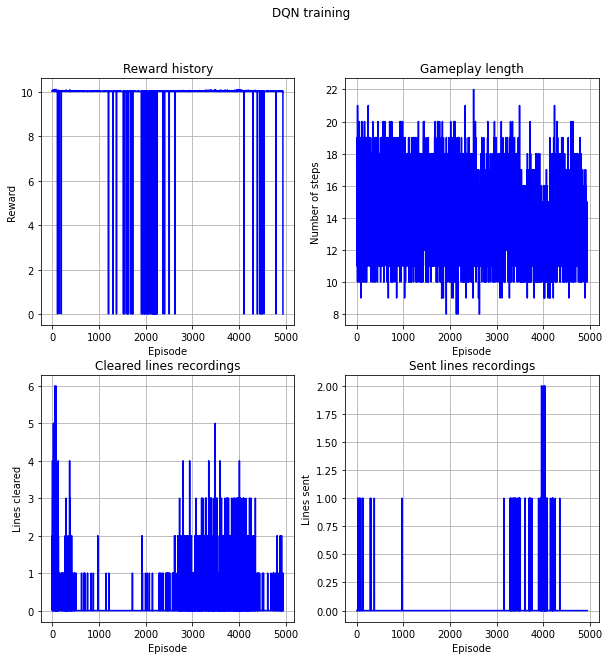

In [11]:
episodes = np.arange(len(r_hist))
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))

fig.suptitle("DQN training")
ax1.plot(episodes, r_hist, "-b")
ax1.grid()
ax1.title.set_text("Reward history")
ax1.set_xlabel('Episode')
ax1.set_ylabel('Reward')
ax2.plot(episodes, step_hist, "-b")
ax2.grid()
ax2.title.set_text("Gameplay length")
ax2.set_xlabel('Episode')
ax2.set_ylabel('Number of steps')
ax3.plot(episodes, cleared_hist, "-b")
ax3.grid()
ax3.title.set_text("Cleared lines recordings")
ax3.set_xlabel('Episode')
ax3.set_ylabel('Lines cleared')
ax4.plot(episodes, sent_hist, "-b")
ax4.grid()
ax4.title.set_text("Sent lines recordings")
ax4.set_xlabel('Episode')
ax4.set_ylabel('Lines sent')
# plt.savefig("plots/cnngaamma99eps1.png", dpi=200)

In [12]:
agent.test(episodes=100)

TypeError: object of type 'int' has no len()

In [ ]:
r_hist = agent.cumulative_rewards_testing
step_hist = agent.steps_per_episode_testing
cleared_hist = agent.lines_cleared_per_episode_testing
sent_hist = agent.lines_sent_per_episode_testing

In [ ]:
episodes = np.arange(len(r_hist))
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))

fig.suptitle("DQN testing")
ax1.plot(episodes, r_hist, "-b")
ax1.grid()
ax1.title.set_text("Reward history")
ax1.set_xlabel('Episode')
ax1.set_ylabel('Reward')
ax2.plot(episodes, step_hist, "-b")
ax2.grid()
ax2.title.set_text("Gameplay length")
ax2.set_xlabel('Episode')
ax2.set_ylabel('Number of steps')
ax3.plot(episodes, cleared_hist, "-b")
ax3.grid()
ax3.title.set_text("Cleared lines recordings")
ax3.set_xlabel('Episode')
ax3.set_ylabel('Lines cleared')
ax4.plot(episodes, sent_hist, "-b")
ax4.grid()
ax4.title.set_text("Sent lines recordings")
ax4.set_xlabel('Episode')
ax4.set_ylabel('Lines sent')

In [16]:
agent.save_state(path="agents/CNN_plus_clear_lines.pth")